# Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
##reading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Analysing the raw data

In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.shape

(7043, 21)

- total number of rows = 7043
- total number of columns = 21

In [5]:
#Checking info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- total object column = 18
- total numerical column = 3
- total charges are in numeric form but showing as a object in info so we need to change this in numeric form.

In [6]:
# checking data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

we observed that there are lots of empty spaces ate there in this columns.lets find out the position of empty spaces

In [8]:
df.loc[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
#transforming object column in numerical type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [10]:
df['TotalCharges'].dtypes

dtype('float64')

In [11]:
#checking the null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- total number of missing values in total charges = 11

In [12]:
#filling the nan with mean values
df['TotalCharges'] = df['TotalCharges'].fillna(np.mean(df['TotalCharges']))

In [13]:
#Checking null values again
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

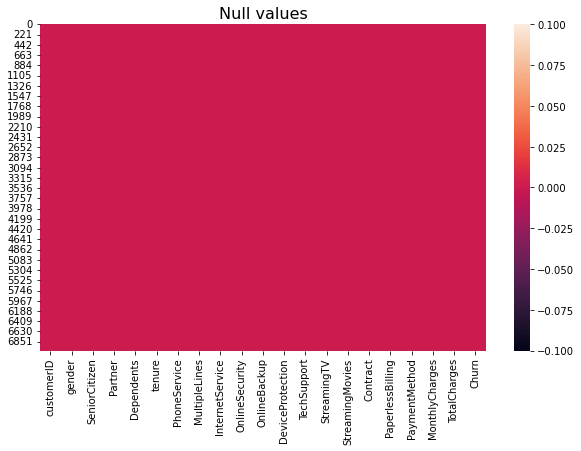

In [14]:
# once again checking null values
plt.figure(figsize=(10,6))
plt.title('Null values',fontsize=16)
sns.heatmap(df.isnull());

- All null values filled up properly now

In [15]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [16]:
#print unique values and there count in each column
for cols in df.columns:
    if df[cols].dtypes=='object':
        print(str(cols)+ ':' + str(df[cols].unique()))
        print(df[cols].value_counts())
        print("***************************************************")
        print('\n')

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
***************************************************


gender:['Female' 'Male']
Male      3555
Female    3488
Name: gender, dtype: int64
***************************************************


Partner:['Yes' 'No']
No     3641
Yes    3402
Name: Partner, dtype: int64
***************************************************


Dependents:['No' 'Yes']
No     4933
Yes    2110
Name: Dependents, dtype: int64
***************************************************


PhoneService:['No' 'Yes']
Yes    6361
No      682
Name: PhoneService, dtype: int64
***************************************************


MultipleLines:['No phone service' 'No' 'Yes']
No                  3390
Yes                 2971


all the unique values is shown and counting of each unique object is mentioned 

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


observation:
-    In senior citizen column standard deviation is more than mean which is a concern.
-    there is a huge jump in the value from 75% to maximum in total charges column.

# EXPLORATORY DATA ANALYSIS

# FOR NUMERIC COLUMN

Minimum 0
Maximum 72


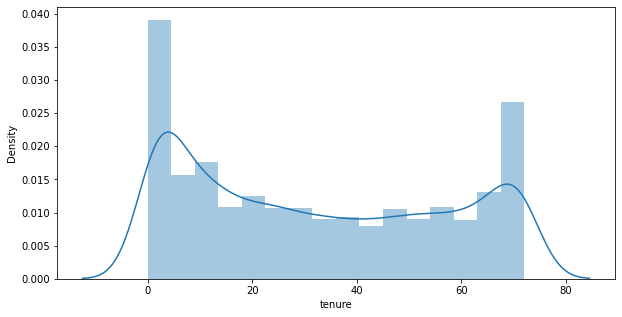

In [18]:
plt.figure(figsize=(10,5))
sns.distplot(df['tenure'])
print('Minimum',df['tenure'].min())
print('Maximum',df['tenure'].max())

The minimum Tenure is 1 and maximum tenure is 72. And the data is little deviated.

Minimum 18.8
Maximum 8684.8


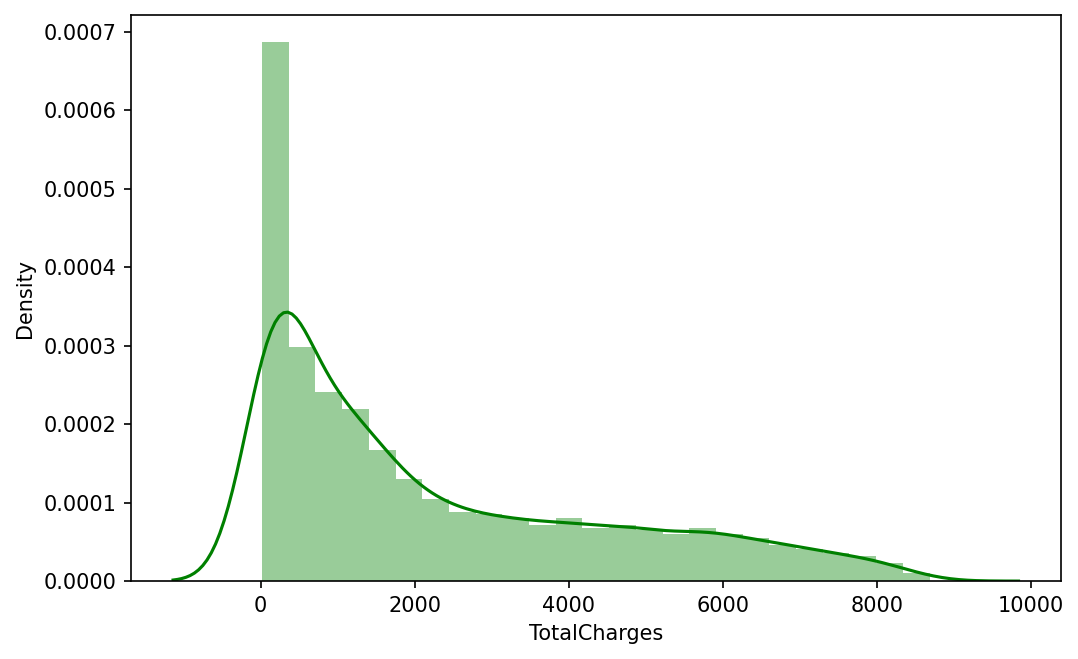

In [19]:
plt.figure(figsize=(8,5),dpi=150)
sns.distplot(df['TotalCharges'],color='g')
print('Minimum',df['TotalCharges'].min())
print('Maximum',df['TotalCharges'].max())

Minimum 18.25
Maximum 118.75


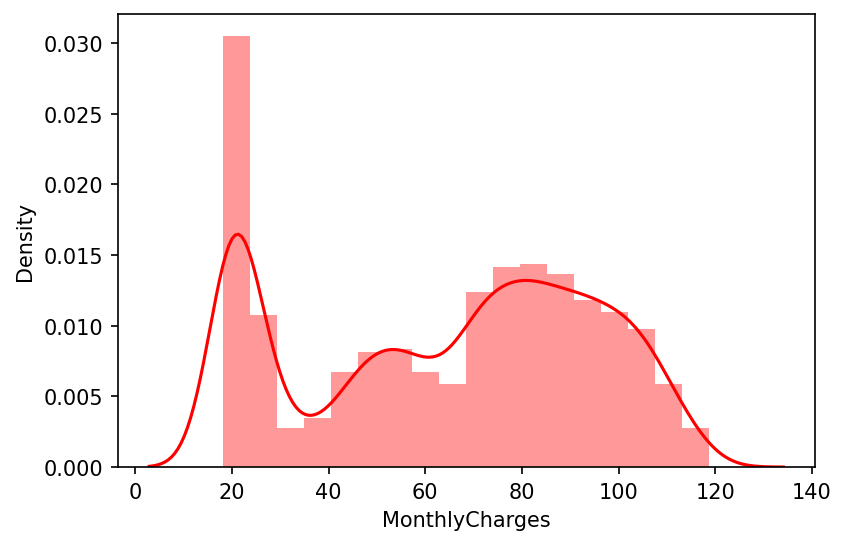

In [20]:
plt.figure(figsize=(6,4),dpi=150)
sns.distplot(df['MonthlyCharges'],color='r')
print('Minimum',df['MonthlyCharges'].min())
print('Maximum',df['MonthlyCharges'].max())

Minimum monthly charge is 18.25 and maximum value is 118.75. As we can see, the feature is bit deviated.

# checking the target variable( Churn )

No     5174
Yes    1869
Name: Churn, dtype: int64

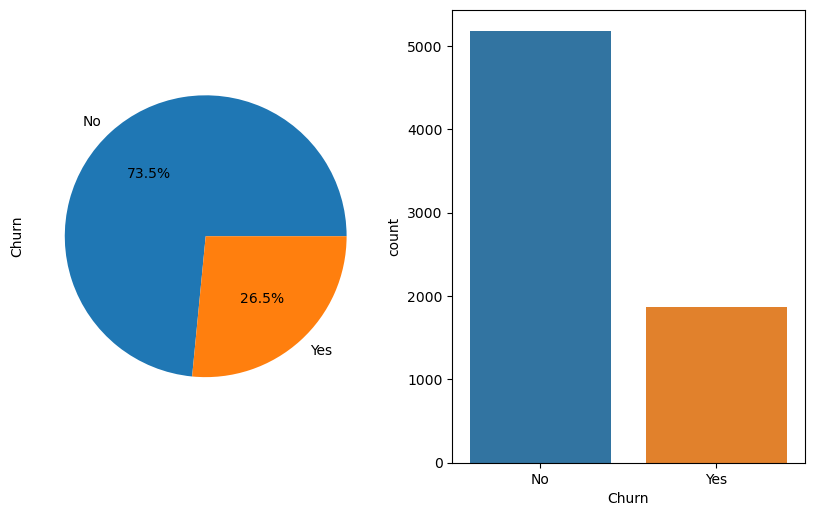

In [21]:
plt.figure(figsize=(10,6),dpi=100)
plt.subplot(1,2,1)
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Churn'])
df['Churn'].value_counts()

As we observed that the count of active customer is more than inactive customer. Like, Active Customer count is 5163 (73.4%) and inactive customer count is 1869 (26.6%).

# FOR CATEGORICAL COLUMNS

In [22]:
def num_val(df,col):
    plt.figure(figsize=(10,5),dpi=100)
    plt.subplot(1,2,1)
    df[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.subplot(1,2,2)
    sns.countplot(df[col],hue='Churn',data=df)
    print(df[col].value_counts())
    

Male      3555
Female    3488
Name: gender, dtype: int64


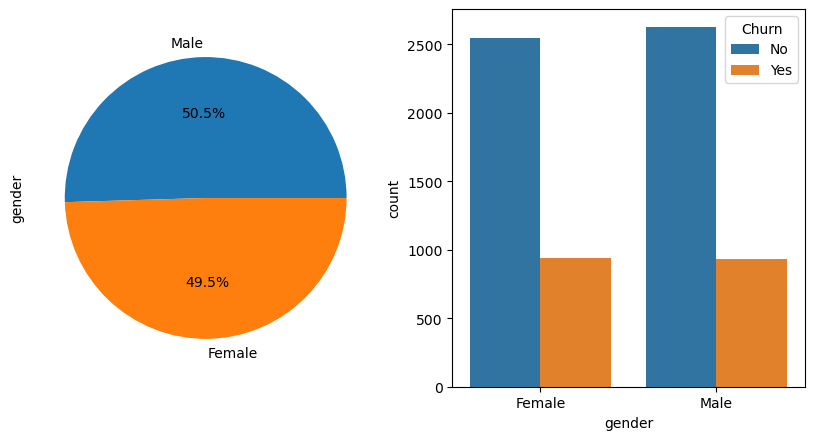

In [23]:
num_val(df,'gender')

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


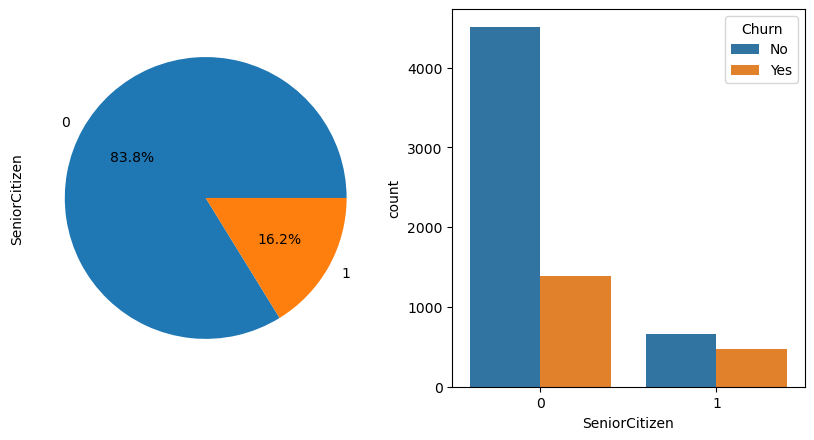

In [24]:
num_val(df,'SeniorCitizen')

No     3641
Yes    3402
Name: Partner, dtype: int64


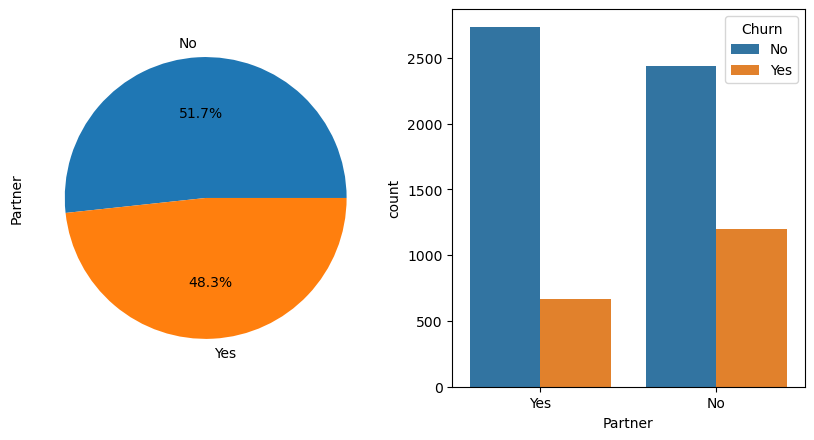

In [26]:
num_val(df,'Partner')

No     4933
Yes    2110
Name: Dependents, dtype: int64


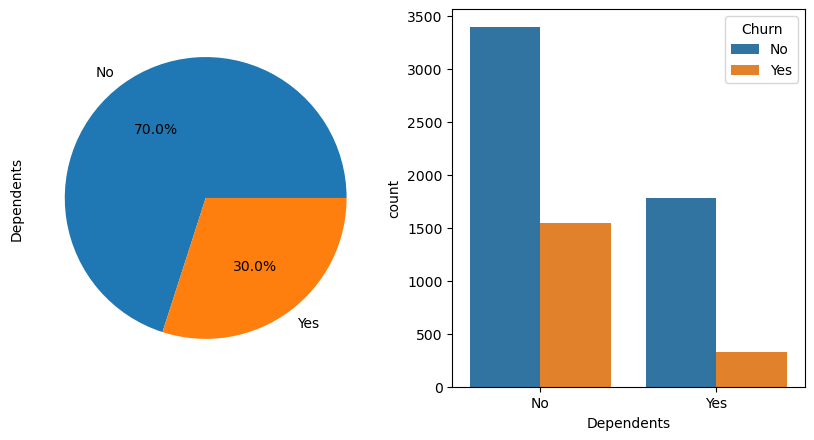

In [28]:
num_val(df,'Dependents')

Yes    6361
No      682
Name: PhoneService, dtype: int64


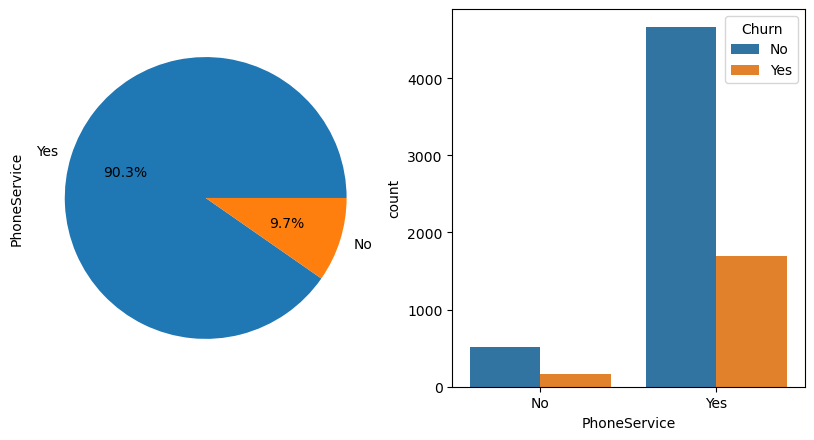

In [29]:
num_val(df,'PhoneService')

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


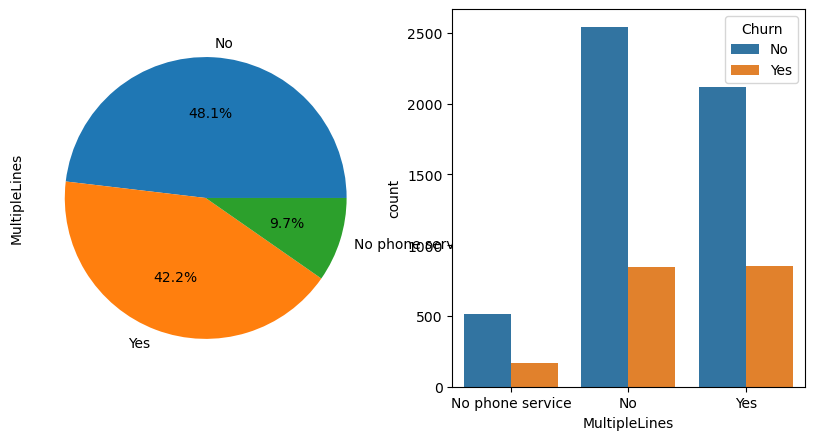

In [30]:
num_val(df,'MultipleLines')

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


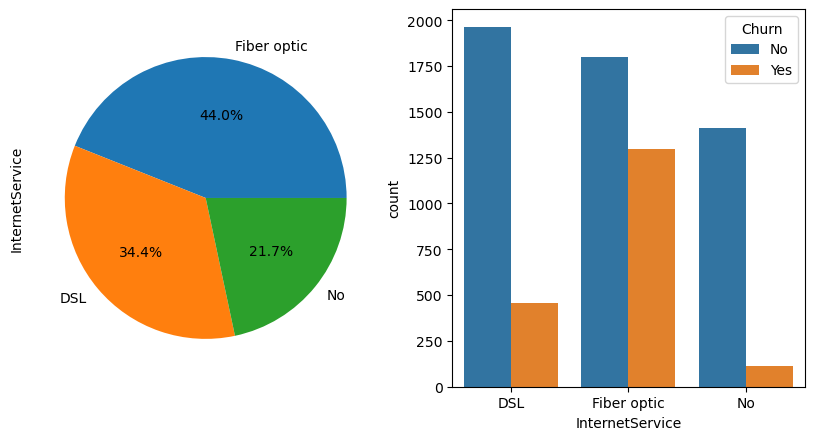

In [31]:
num_val(df,'InternetService')

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


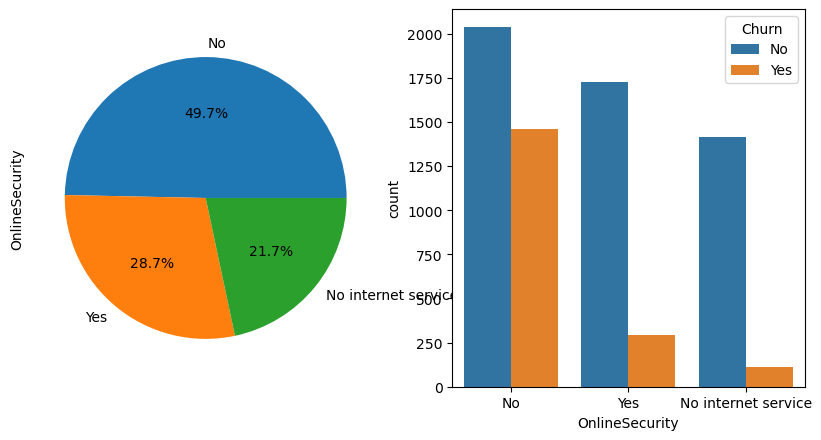

In [32]:
num_val(df,'OnlineSecurity')

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


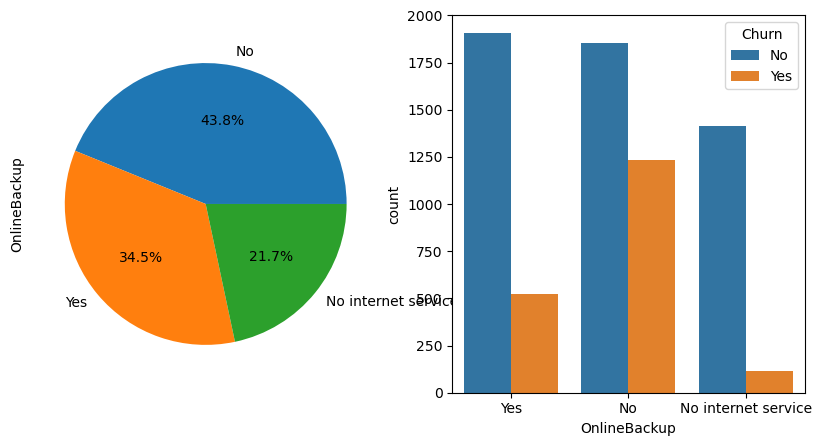

In [33]:
num_val(df,'OnlineBackup')

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


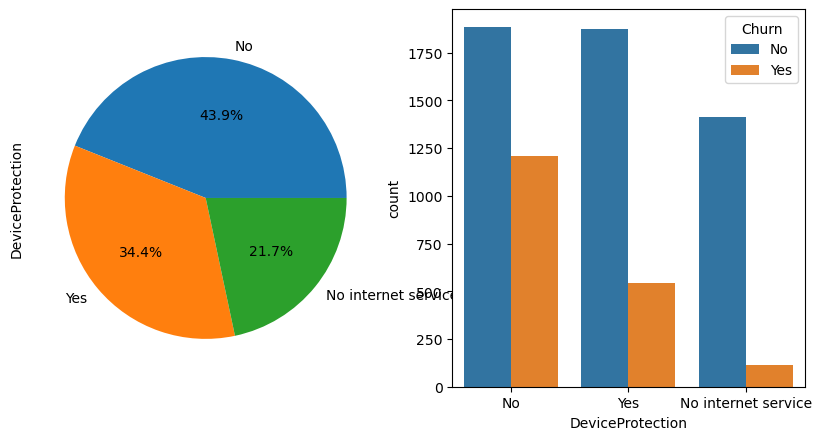

In [34]:
num_val(df,'DeviceProtection')

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


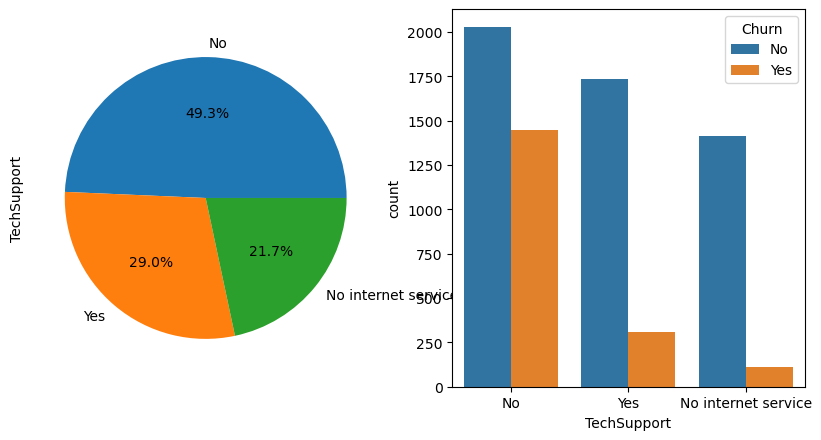

In [35]:
num_val(df,'TechSupport')

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


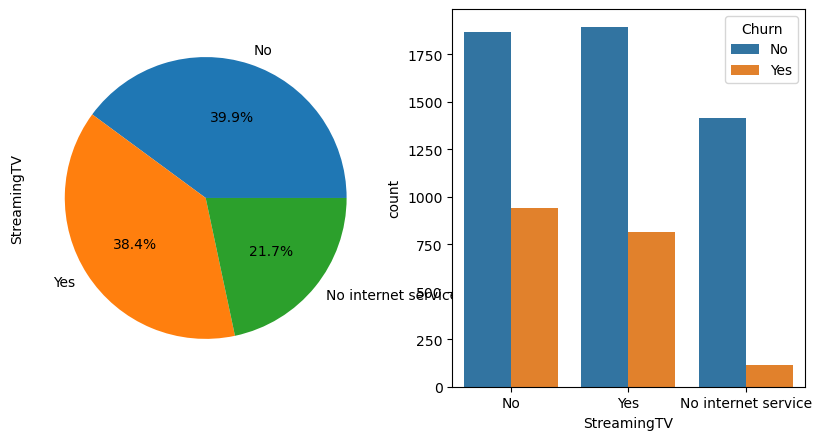

In [36]:
num_val(df,'StreamingTV')

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


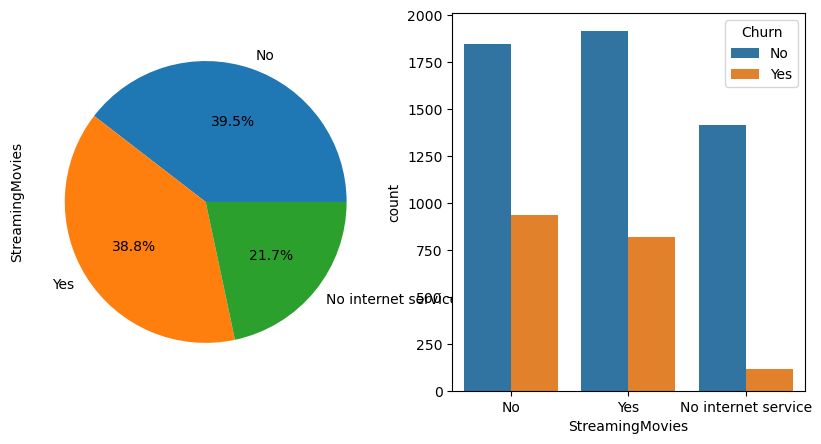

In [37]:
num_val(df,'StreamingMovies')

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


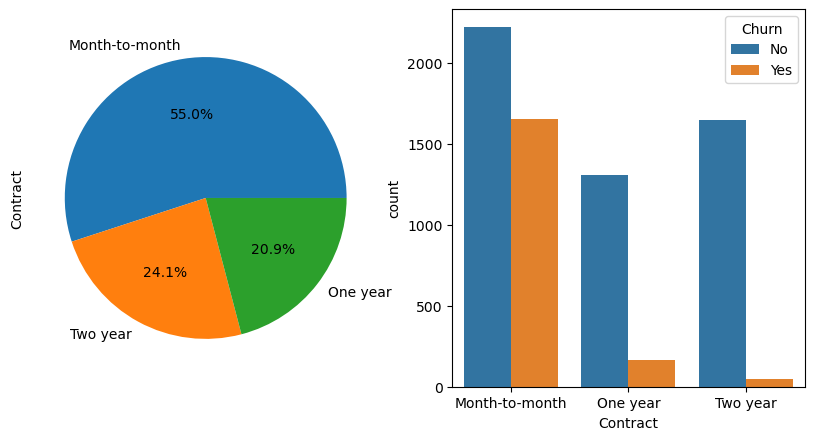

In [38]:
num_val(df,'Contract')

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


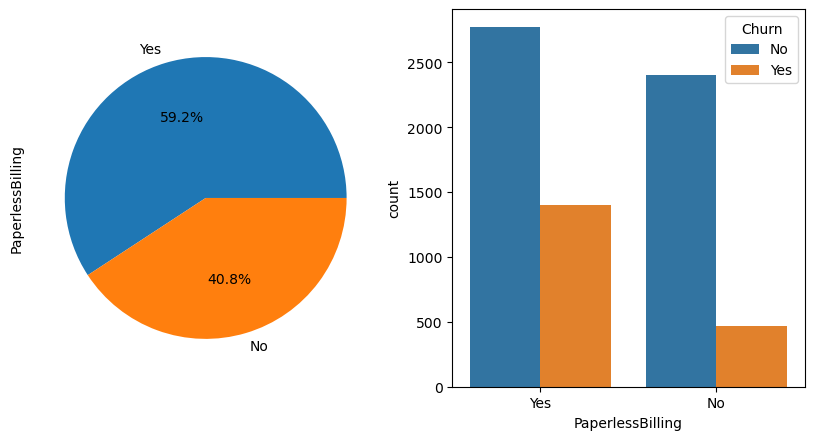

In [39]:
num_val(df,'PaperlessBilling')

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


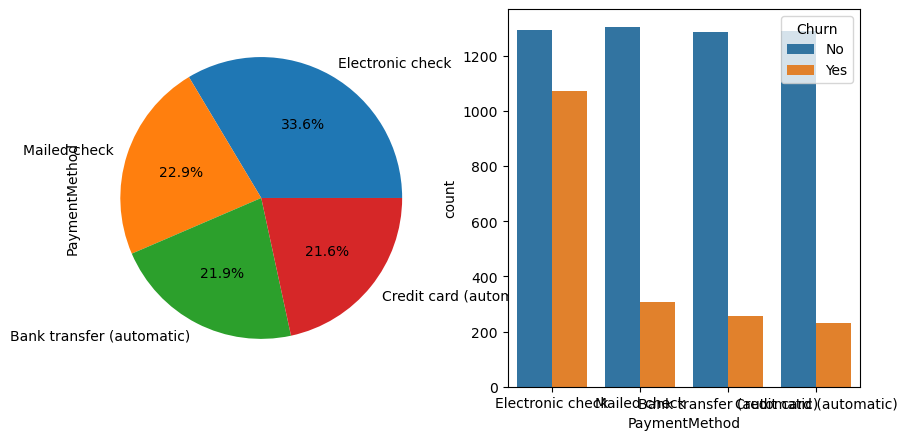

In [40]:
num_val(df,'PaymentMethod')

# MULTIVARAITE ANALYSIS OF NUMERICAL COLUMNS

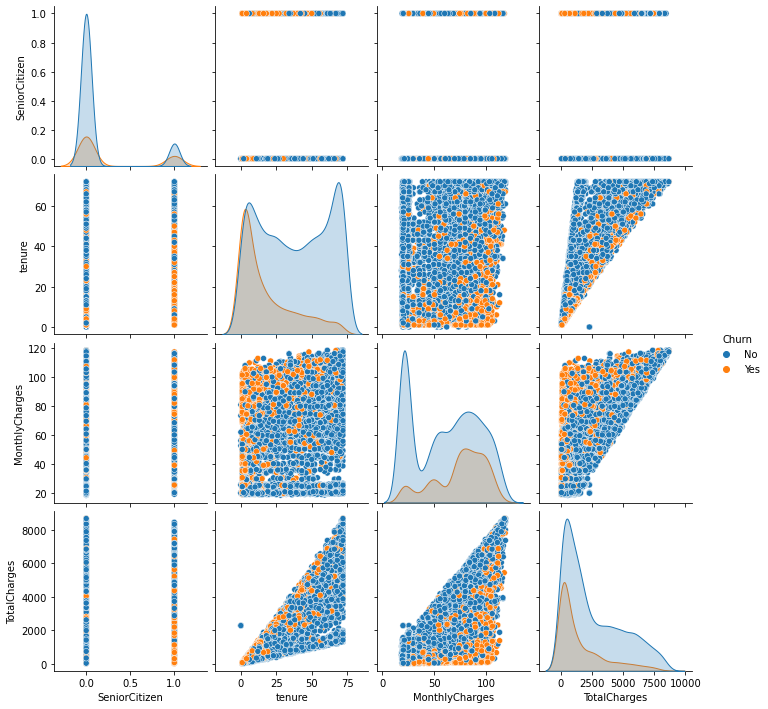

In [41]:
sns.pairplot(data=df,hue='Churn')

# DETECTING OUTLIERS

In [58]:
num_cols = ['MonthlyCharges','SeniorCitizen','TotalCharges', 'tenure']

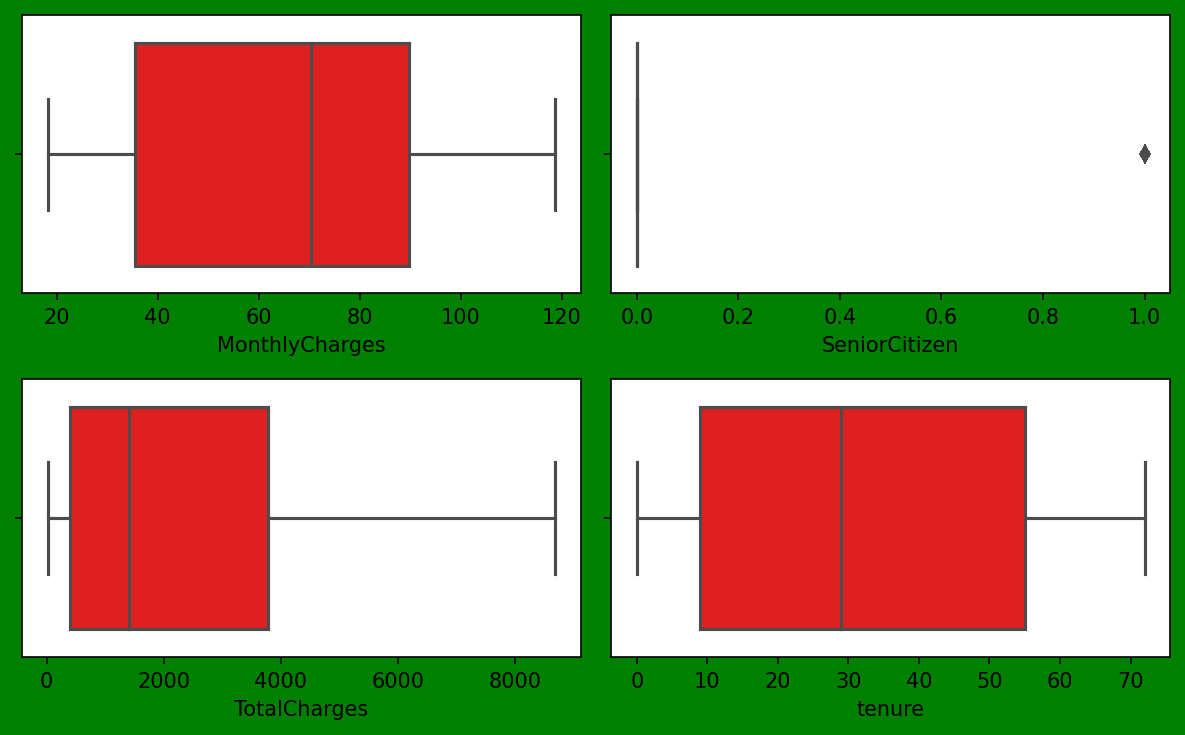

In [59]:
#checking for outliers
plt.figure(figsize=(8,5),dpi=150,facecolor='green')
plotnumber=1

for columns in num_cols:
    plt.subplot(2,2,plotnumber)
    sns.boxplot(df[columns],color='red')
    plt.xlabel(columns,fontsize=10)
    plotnumber += 1
    plt.tight_layout()


observation
- no outliers has been detected except senior citizen but this will not be a problem for data set

# checking skewness

In [54]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

little bit of skewness is observed in total charges and senior citizen.but we treat total charges only lateron.

# multivaraite and bivariate analysis

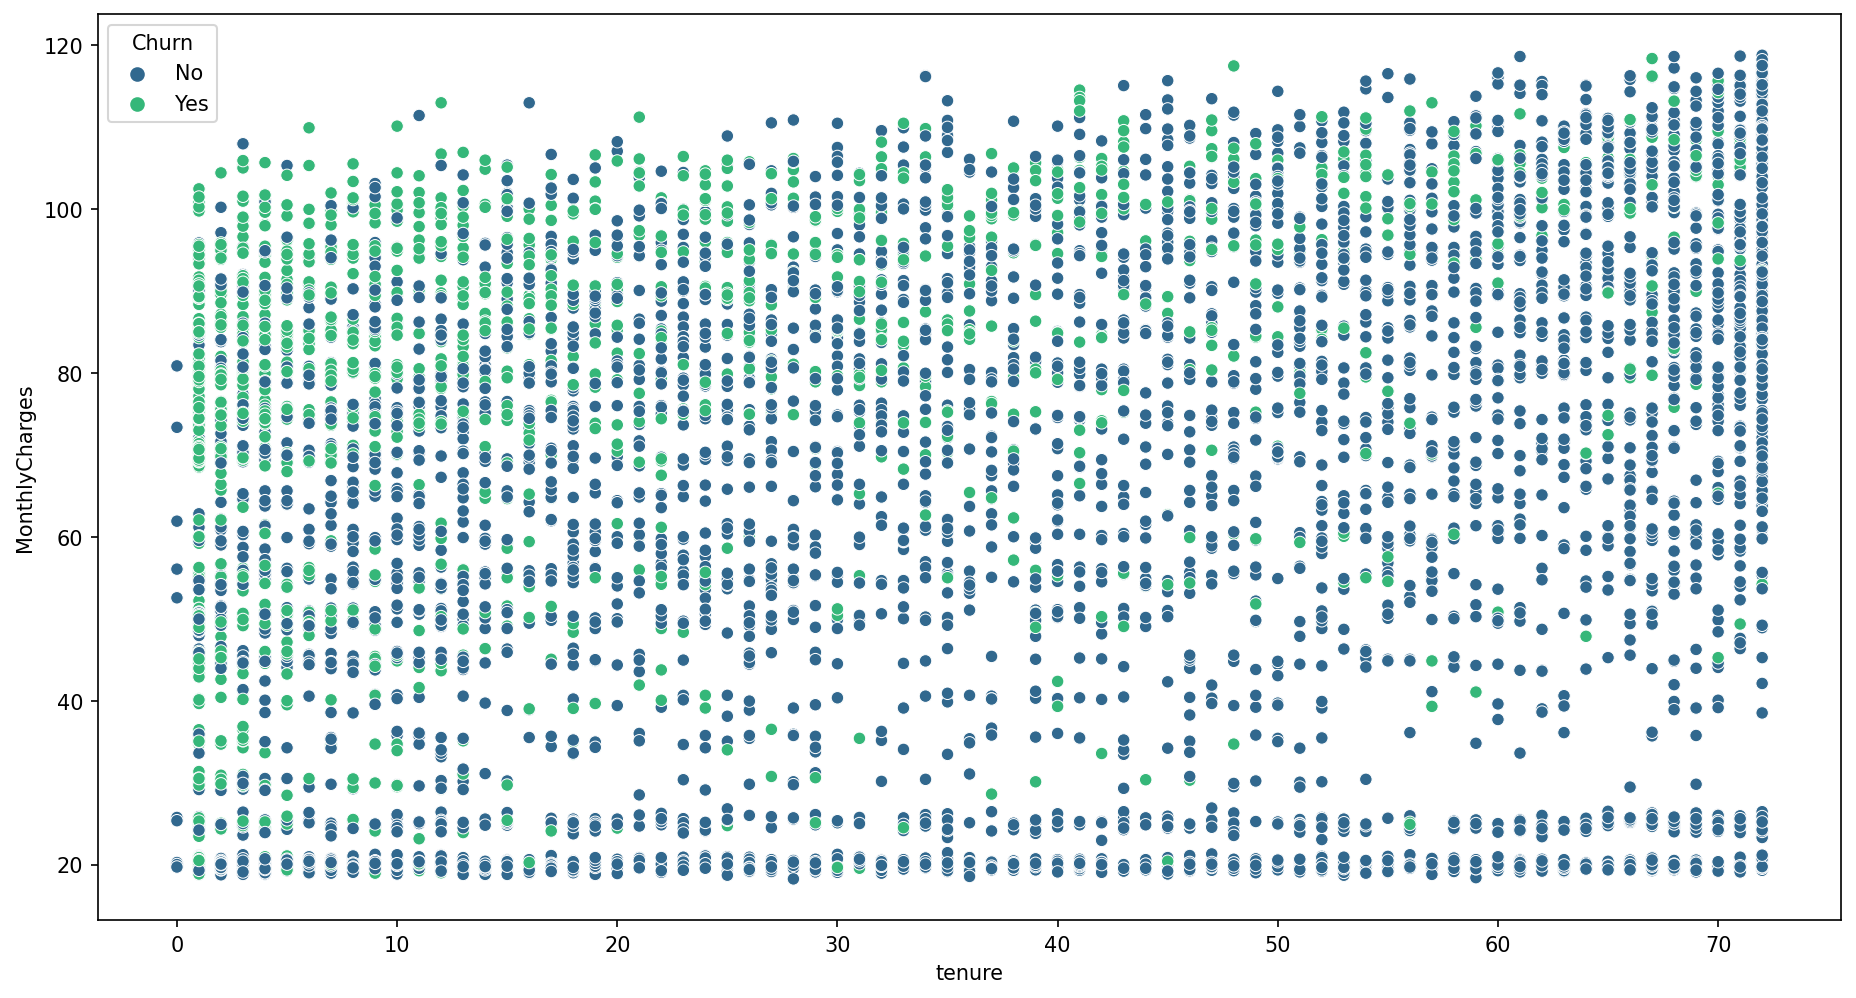

In [48]:
#Let's check scatter plot of Monthly charges and tenure with churn
plt.figure(figsize = (15,8),dpi=150)
sns.scatterplot(df['tenure'], df['MonthlyCharges'], hue = df['Churn'], palette = 'viridis')
plt.show()

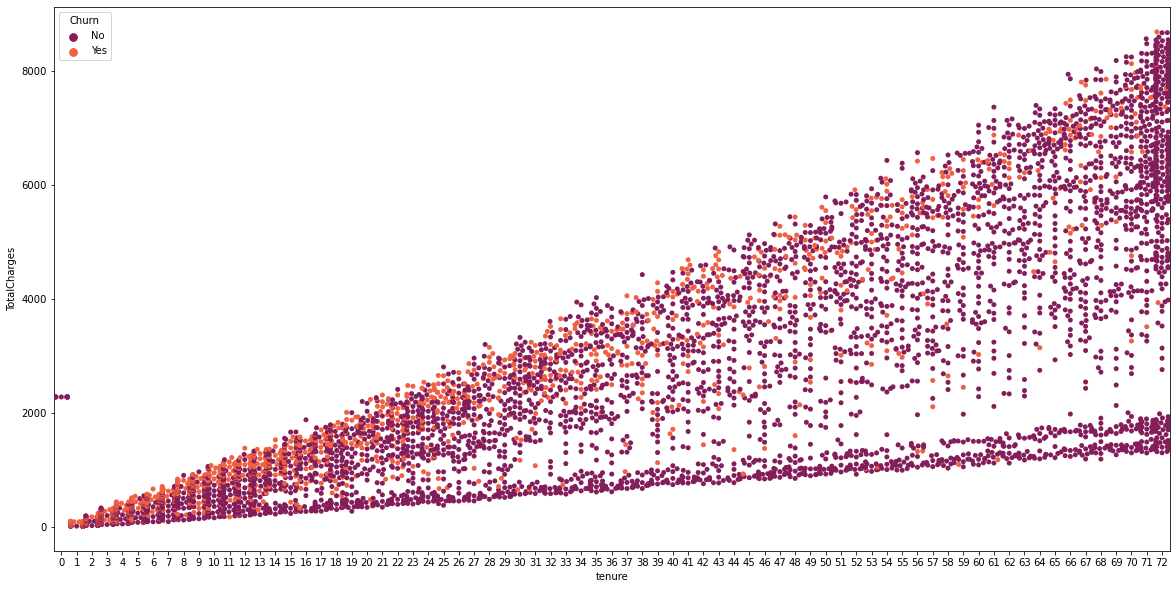

In [49]:
#Let's check scatter plot of Total charges and tenure with churn
plt.figure(figsize = (20,10))
sns.swarmplot(df['tenure'], df['TotalCharges'], hue = df['Churn'], palette = 'rocket')
plt.show()

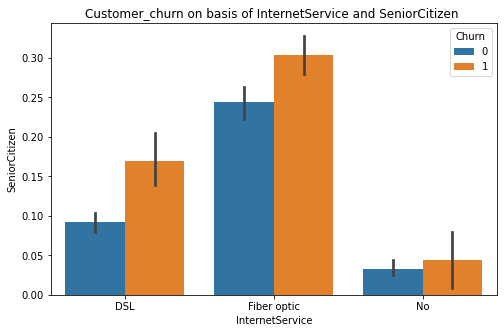

In [79]:
plt.figure(figsize=(8,5))
sns.barplot(x='InternetService',y='SeniorCitizen',hue='Churn',data=df).set_title('Customer_churn on basis of InternetService and SeniorCitizen ')
plt.show()

# Checking the relations between Churn with continuous features first.

In [50]:
#let's divide the target variable churn and features
y = df['Churn']
x = df.drop(columns=['Churn','customerID'],axis=1)
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


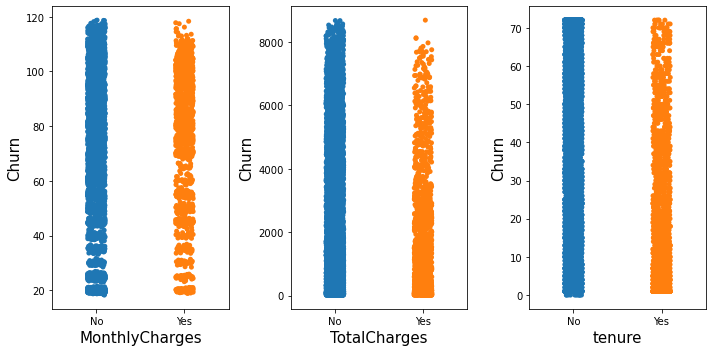

In [60]:
num_col = df[['MonthlyCharges','TotalCharges', 'tenure']]
plt.figure(figsize=(10,5),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=4:
        ax=plt.subplot(1,3,plotnumber)
        sns.stripplot(y,num_col[column])
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Churn',fontsize=15)
    plotnumber+=1
plt.tight_layout();

- Long duration of tenure is good for active customers. More long the tenure is more customer is actively using telecom.

- as monthly charges increases,there is a possibility to become inactive customer.

- Total charges is the accumulation of all charges. More total charges more active customers.

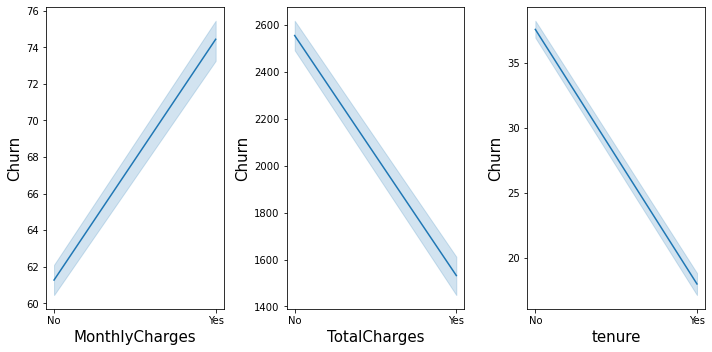

In [61]:
plt.figure(figsize=(10,5),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.lineplot(y,num_col[column])
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Churn',fontsize=15)
    plotnumber+=1
plt.tight_layout();

# Encoding the target first to compare the target variable with features

In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [64]:
lab_enc = LabelEncoder()
object = ['Churn']
#Tranforming object data using Label Encoder
for i in object:
    df[i] = lab_enc.fit_transform(df[i])

the target variable 'Churn' is encoded into 0 and 1. ( 0 = Active Customer, 1 = Inactive Customer )

# Analysing few important relation

In [68]:
def obj(df,col):
    plt.figure(figsize=(10,6))
    plt.title(col + 'vs Churn',fontsize=20)
    sns.countplot(df[col],data=df,hue="Churn",palette='Set1')

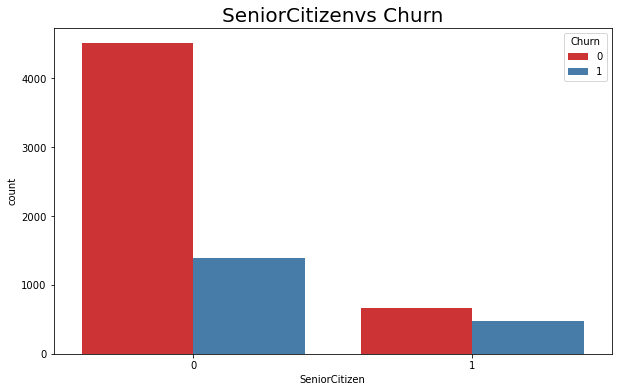

In [69]:
obj(df,'SeniorCitizen')

Most of the Senior citizen are the active customers and churning are less as comparison to inactive customer

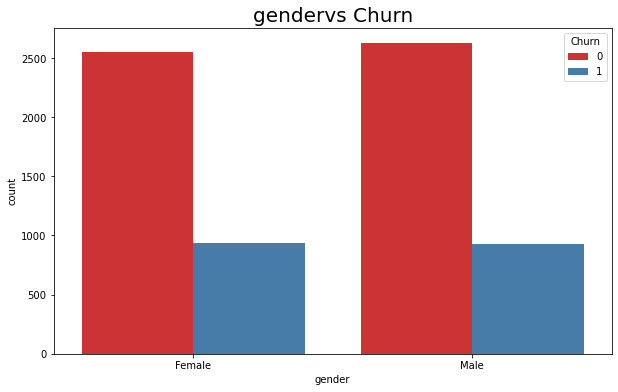

In [67]:
obj(df,'gender')

Both in male and female categories there are more active customers than inactive customers

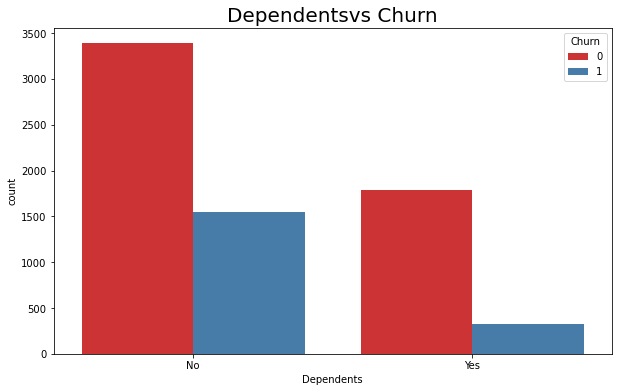

In [70]:
obj(df,'Dependents')

Customers without dependents are more likely to be active than customers with dependents. Inactive customers without dependents are also there in large number.

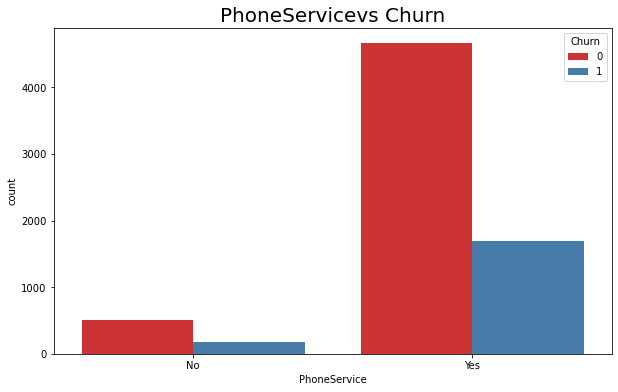

In [71]:
obj(df,'PhoneService')

Customers with Phone Service is more and active than customers without Phone service.

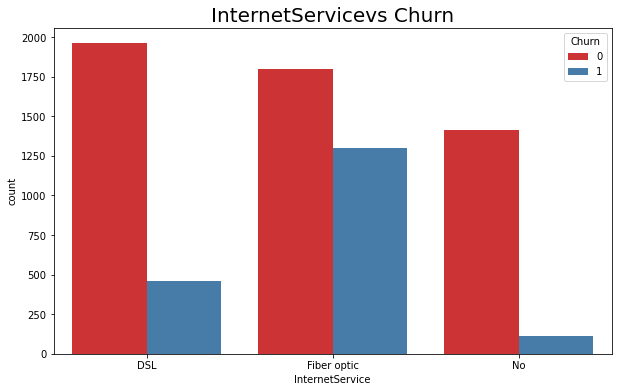

In [72]:
obj(df,'InternetService')

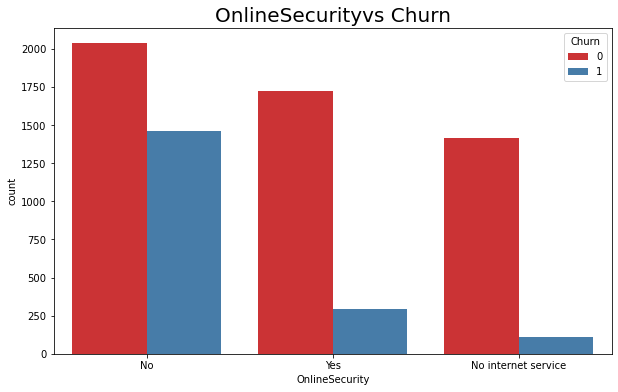

In [73]:
obj(df,'OnlineSecurity')

The Count of active customers without online security is highest and the count of inactive customers of the same category is also huge.

Whereas the count of inactive customers with online security is very less regarding active customers of the category.

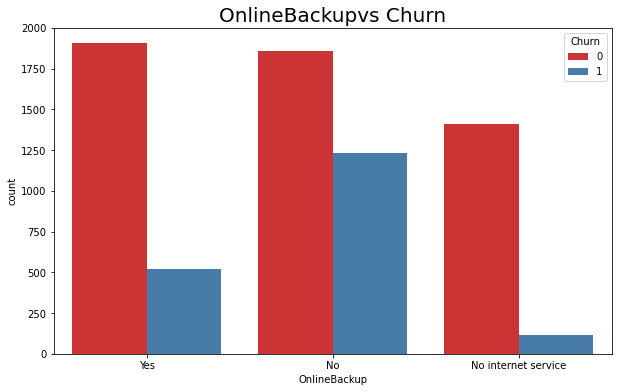

In [74]:
obj(df,'OnlineBackup')

observation:
- The Count of active customers with online backup and the Count of active customers without online backup is almost same and highest.
Whereas the count of inactive customers without online backup is huge regarding active customers of the category.

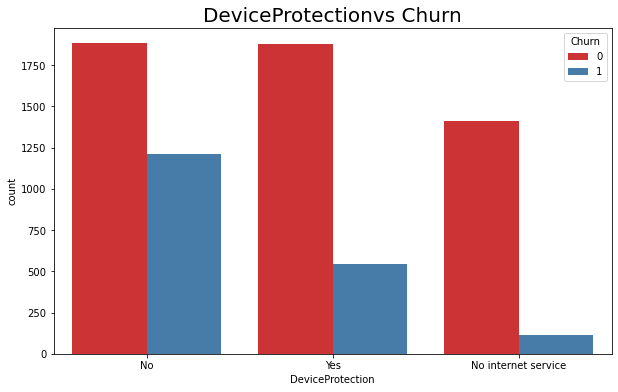

In [75]:
obj(df,'DeviceProtection')

The Count of active customers with Device protection and the Count of active customers without device protection is almost same and highest.
Whereas the count of inactive customers without device protection is huge regarding active customers of that category.

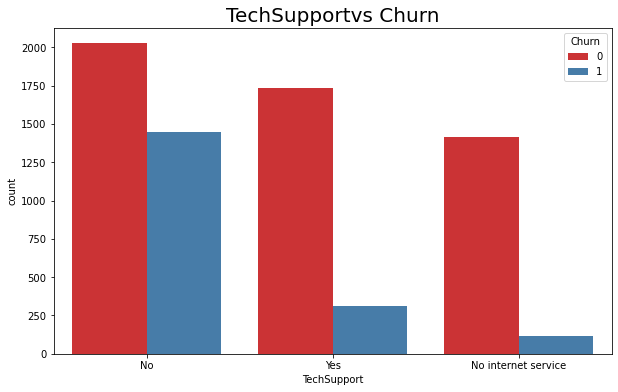

In [76]:
obj(df,'TechSupport')

The Count of active customers without Tech Support is highest than customers with tech support.
Whereas the count of inactive customers without Tech support is huge regarding active customers of the category.

None
None
None
None
None


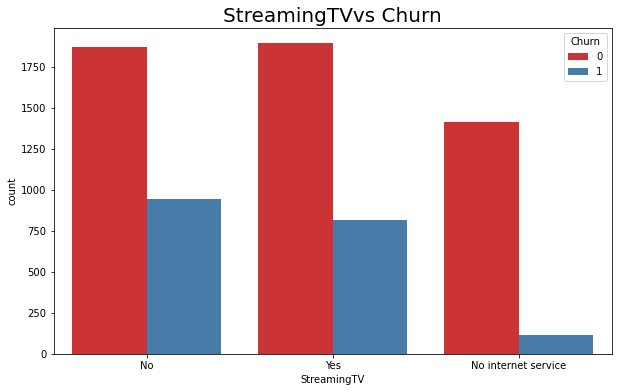

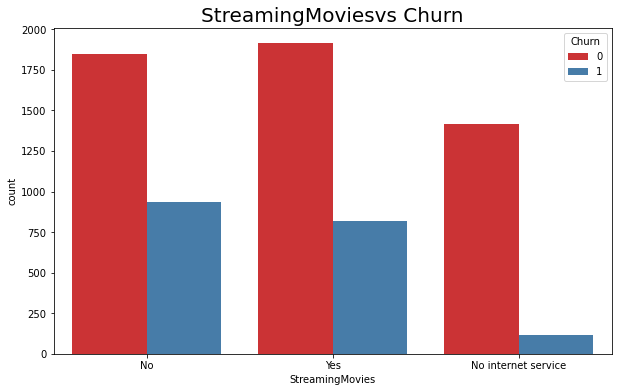

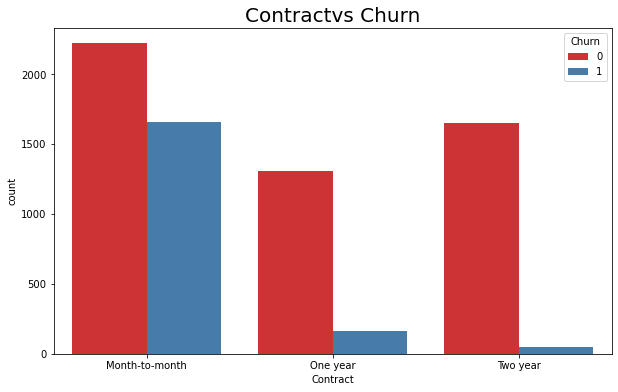

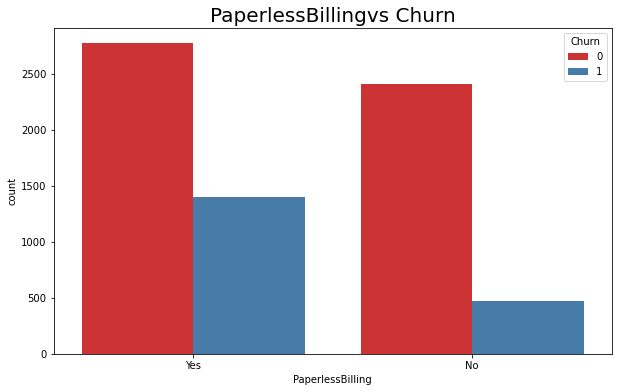

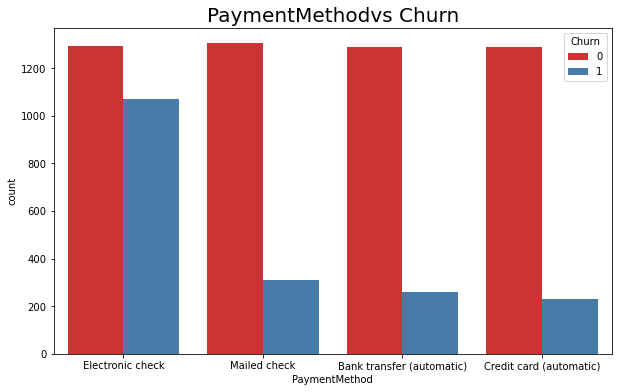

In [78]:
print(obj(df,'StreamingTV'))
print(obj(df,'StreamingMovies'))
print(obj(df,'Contract'))
print(obj(df,'PaperlessBilling'))
print(obj(df,'PaymentMethod'))

# Now plotting the heatmap to check correlation

In [80]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016567,0.220173,0.102395,0.150889
tenure,0.016567,1.000000,0.247900,0.824757,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.650468,0.193356
TotalCharges,0.102395,0.824757,0.650468,1.000000,-0.199428
Churn,0.150889,-0.352229,0.193356,-0.199428,1.000000


<Figure size 600x400 with 0 Axes>

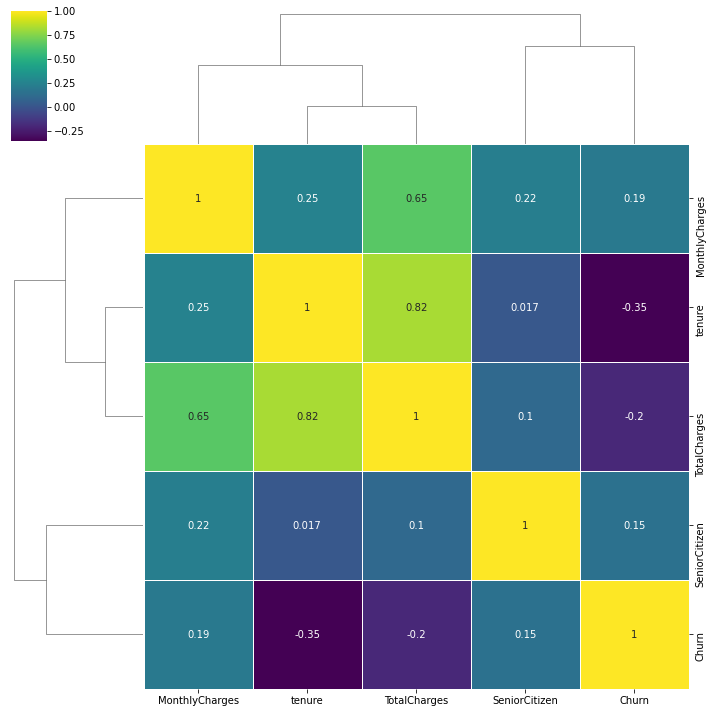

In [82]:
plt.figure(dpi=100)
sns.clustermap(df.corr(),linewidth=0.5,
            annot=True,cmap='viridis')

As we can see there is a correlation between tenure and total charges.
There is weak correlation between monthly charge and total charges.

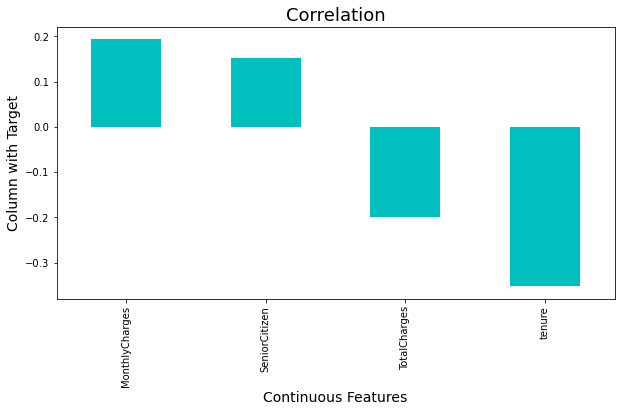

In [83]:
plt.figure(figsize=(10,5))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Continuous Features',fontsize=14)
plt.ylabel('Column with Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show();

- Monthly Charges and Senior citizen features are positively related with target variable.
- Total charges and Tenure are negatively related with target variable.

# FEATURE ENGINEERING

In [84]:
df['tenure'].max()

72

The independent variable tenure is containing months as tenure. The range is from 1 to 72 months. For more simplicity we are going to combine those months into different groups.

In [85]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]  #12 months is the step size
df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

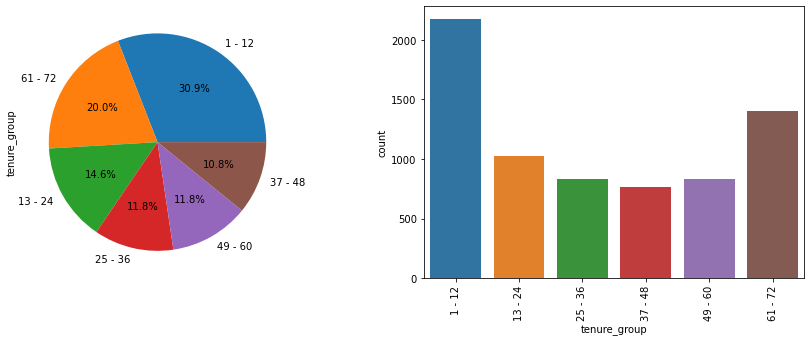

In [86]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['tenure_group'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['tenure_group'])
plt.xticks(rotation=90)
df['tenure_group'].value_counts()

observation:
-    As we can see, there are diiferent groups of tenure where each group is having 12 months of duration.
-    Customers are more likely in tenure 1-12 group than other groups.

In [87]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [88]:
# Dropping  unnecessary columns
df=df.drop(columns=['tenure'],axis=1)

In [89]:
df = df.drop(columns=['customerID'],axis=1)
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36


# Encoding the categorical columns

In [91]:
df1 = pd.get_dummies(df)
df1.head(2)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [93]:
corr=df1.corr()
corr.shape

(51, 51)

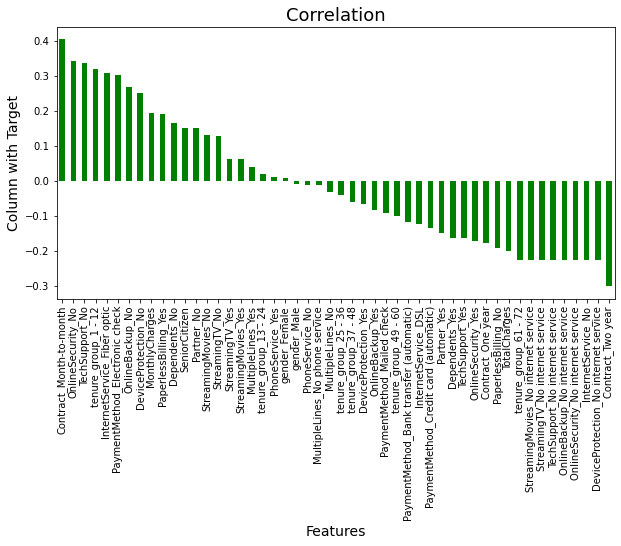

In [94]:
plt.figure(figsize=(10,5))
df1.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column with Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show();

some of the features have positive correlation with target and rest of the features are having negative correlation with the feature.

# checking skewness

In [95]:
df.skew()

SeniorCitizen     1.833633
MonthlyCharges   -0.220524
TotalCharges      0.962394
Churn             1.063031
dtype: float64

Totalcharges has some skweness and senior citizen also has but eill not creates problem to data set

In [98]:
features = ['TotalCharges']
scaler = PowerTransformer(method='yeo-johnson')
#scaling the features
df1[features] = scaler.fit_transform(df[features].values)
df1[features].head()

,TotalCharges
0,-1.810588
1,0.253313
2,-1.387269
3,0.232253
4,-1.250118


# split the data set into target and variable 

In [100]:
x=df1.drop(columns=['Churn'])
y=df1['Churn']

In [102]:
x.shape

(7043, 50)

In [103]:
y.shape

(7043,)

# Feature Importances

[0.02691505 0.11943762 0.1425763  0.02155385 0.02232743 0.01887597
 0.01836143 0.01478118 0.01478994 0.00297006 0.00316497 0.01526544
 0.00316791 0.01491319 0.01544956 0.02301223 0.00362322 0.03343041
 0.00290408 0.01158597 0.0185151  0.00256703 0.01484918 0.01899189
 0.00364732 0.01512039 0.02344989 0.0037615  0.01290439 0.01411158
 0.00229156 0.01426138 0.01351726 0.00330595 0.01493461 0.06279356
 0.0114258  0.01554462 0.01702543 0.01626961 0.01488545 0.01489758
 0.03207589 0.0126305  0.04169797 0.01226444 0.01125473 0.01030056
 0.01000837 0.01159063]


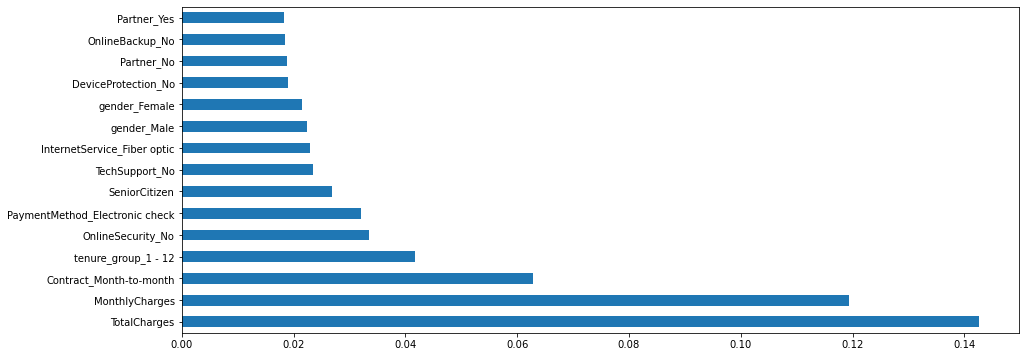

In [105]:
from sklearn.ensemble import ExtraTreesClassifier
selection=ExtraTreesClassifier()
selection.fit(x,y)
##use inbuilt class feature_importances of tree based classifiers
print(selection.feature_importances_)
# for plotting
plt.figure(figsize=(15,6))
feat_importances=pd.Series(selection.feature_importances_,index=x.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show();

# MODEL BUILDINGS

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, train_test_split

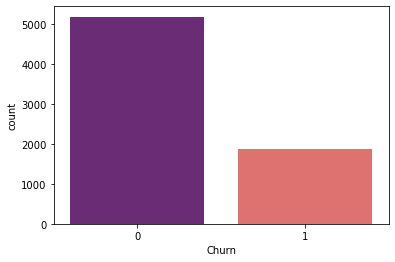

In [106]:
#Printing count of Churn
sns.countplot(y, palette = 'magma')
plt.show()

ABOVE FIG SHOWS THAT THE DATASET IS IMBALANCED

In [107]:
smt = SMOTE()
x,y = smt.fit_resample(x,y)

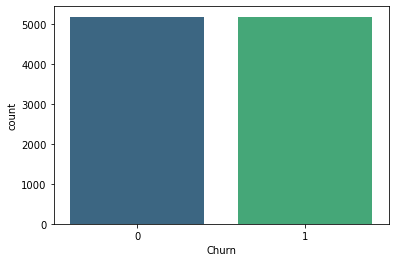

In [108]:
#Checking target variable again after using SMOTE
sns.countplot(y, palette = 'viridis')
plt.show()

now the dataset is balanced.

In [126]:
def max_accuracy_score(clf,x,y):
    max_accuracy=0
    for i in range(40,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i,stratify=y) 
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy*100)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean()*100)
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std()*100)
    print('\n')
    print('F1 score',f1_score(y_test,pred)*100)
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred)*100)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    return final_r

# LogisticRegression

max accuracy score corresponding to 71 is 86.85990338164251


cross validation score 83.4474774856812


Standard Deviation 8.618157305754531


F1 score 84.71876555500248


Training accuracy 85.35878231456874


Test Accuracy 85.16908212560386


Confusion Matrix [[912 123]
 [184 851]]


Classification Report               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1035
           1       0.87      0.82      0.85      1035

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



Roc_auc Score 85.16908212560385





71

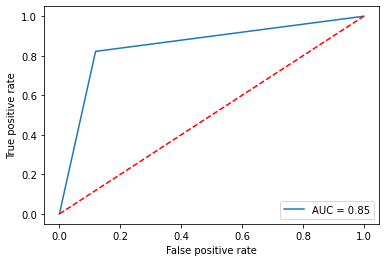

In [127]:
lr=LogisticRegression()
max_accuracy_score(lr,x,y)

# DECISION TREE

max accuracy score corresponding to 87 is 81.30434782608695


cross validation score 79.04056429977373


Standard Deviation 6.333096581983853


F1 score 79.16464303059738


Training accuracy 99.81879681082387


Test Accuracy 79.27536231884058


Confusion Matrix [[826 209]
 [220 815]]


Classification Report               precision    recall  f1-score   support

           0       0.79      0.80      0.79      1035
           1       0.80      0.79      0.79      1035

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



Roc_auc Score 79.27536231884058





87

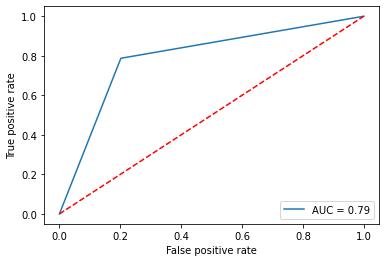

In [128]:
dt=DecisionTreeClassifier()
max_accuracy_score(dt,x,y)

# KNN

max accuracy score corresponding to 41 is 84.10628019323671


cross validation score 83.05987396184298


Standard Deviation 2.05583282513745


F1 score 84.28063943161635


Training accuracy 88.04058951437545


Test Accuracy 82.89855072463767


Confusion Matrix [[767 268]
 [ 86 949]]


Classification Report               precision    recall  f1-score   support

           0       0.90      0.74      0.81      1035
           1       0.78      0.92      0.84      1035

    accuracy                           0.83      2070
   macro avg       0.84      0.83      0.83      2070
weighted avg       0.84      0.83      0.83      2070



Roc_auc Score 82.89855072463769





41

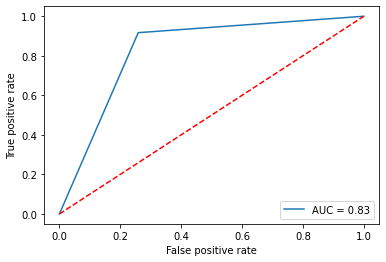

In [129]:
knn=KNeighborsClassifier()
max_accuracy_score(knn,x,y)

# Naive Bayes

max accuracy score corresponding to 63 is 79.71014492753623


cross validation score 77.37751907033433


Standard Deviation 1.2693580803410627


F1 score 78.73799725651578


Training accuracy 77.45832326648949


Test Accuracy 77.53623188405797


Confusion Matrix [[744 291]
 [174 861]]


Classification Report               precision    recall  f1-score   support

           0       0.81      0.72      0.76      1035
           1       0.75      0.83      0.79      1035

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.77      2070
weighted avg       0.78      0.78      0.77      2070



Roc_auc Score 77.53623188405797





63

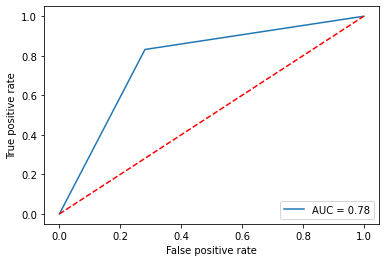

In [130]:
gnb=GaussianNB()
max_accuracy_score(gnb,x,y)

# RANDOM FOREST

max accuracy score corresponding to 51 is 87.14975845410629


cross validation score 85.07067056128774


Standard Deviation 6.273840602684003


F1 score 85.8817782120176


Training accuracy 99.81879681082387


Test Accuracy 86.03864734299516


Confusion Matrix [[902 133]
 [156 879]]


Classification Report               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1035
           1       0.87      0.85      0.86      1035

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



Roc_auc Score 86.03864734299518





51

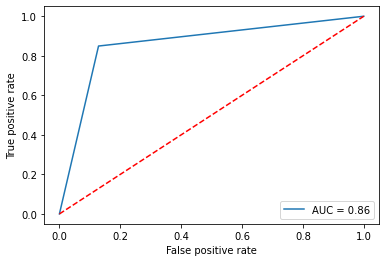

In [131]:
rf=RandomForestClassifier()
max_accuracy_score(rf,x,y)

# Ada Boost

max accuracy score corresponding to 71 is 85.02415458937197


cross validation score 81.75575028660955


Standard Deviation 5.005445154813624


F1 score 83.14393939393939


Training accuracy 82.89441894177337


Test Accuracy 82.80193236714976


Confusion Matrix [[836 199]
 [157 878]]


Classification Report               precision    recall  f1-score   support

           0       0.84      0.81      0.82      1035
           1       0.82      0.85      0.83      1035

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



Roc_auc Score 82.80193236714976





71

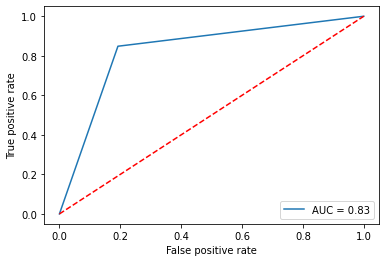

In [132]:
Adb=AdaBoostClassifier()
max_accuracy_score(Adb,x,y)

# Gardient Boost

max accuracy score corresponding to 71 is 86.57004830917874


cross validation score 83.50513095313146


Standard Deviation 6.2630401283308546


F1 score 85.12673362027738


Training accuracy 85.95071273254409


Test Accuracy 84.97584541062801


Confusion Matrix [[869 166]
 [145 890]]


Classification Report               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1035
           1       0.84      0.86      0.85      1035

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



Roc_auc Score 84.97584541062801





71

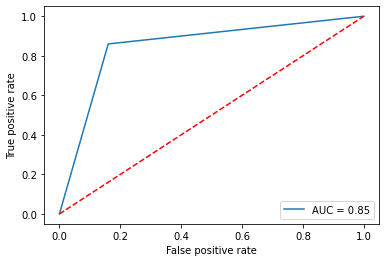

In [133]:
gb=GradientBoostingClassifier()
max_accuracy_score(gb,x,y)

max accuracy score corresponding to 53 is 85.31400966183574


cross validation score 83.32168682856896


Standard Deviation 7.006979528560127


F1 score 82.90981564524166


Training accuracy 98.96110171539019


Test Accuracy 83.42995169082126


Confusion Matrix [[895 140]
 [203 832]]


Classification Report               precision    recall  f1-score   support

           0       0.82      0.86      0.84      1035
           1       0.86      0.80      0.83      1035

    accuracy                           0.83      2070
   macro avg       0.84      0.83      0.83      2070
weighted avg       0.84      0.83      0.83      2070



Roc_auc Score 83.42995169082126





53

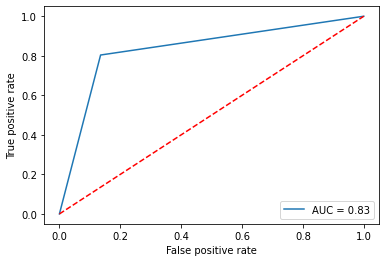

In [134]:
bg = BaggingClassifier()
max_accuracy_score(bg,x,y)

max accuracy score corresponding to 51 is 85.89371980676329


cross validation score 78.97245045915902


Standard Deviation 5.604957167011308


F1 score 84.5272206303725


Training accuracy 84.07827977772409


Test Accuracy 84.34782608695653


Confusion Matrix [[861 174]
 [150 885]]


Classification Report               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1035
           1       0.84      0.86      0.85      1035

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



Roc_auc Score 84.34782608695653





51

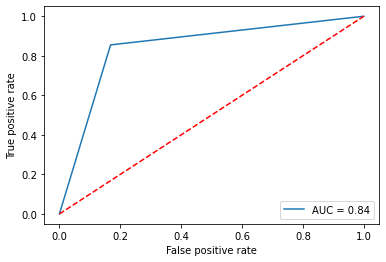

In [135]:
SGH_model = SGDClassifier()
max_accuracy_score(SGH_model,x,y)

# Hyper Tuning Random Forest Classifier as it provides the best accuracy rate

In [136]:
#Let's tune the parameters using GridSearchCV
params = {
    'n_estimators':[13,15,17],
    'criterion':['gini','entropy'],
    'max_depth':[10,15],
    'min_samples_leaf':[5,6],
    'min_samples_split':[10,11],
}
grd = GridSearchCV(rf, param_grid = params)
grd.fit(x_train,y_train)

print('best_params=>', grd.best_params_)

best_params=> {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 6, 'min_samples_split': 11, 'n_estimators': 15}


In [137]:
RFR_model = grd.best_estimator_
RFR_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=6,
                       min_samples_split=11, n_estimators=15)

In [138]:
#Model Confidence/Accuracy
print('Accuracy_Score of  Random Forest Model is', accuracy_score(y_test,RFR_model.predict(x_test))*100)
print("Cross Validation accuracy score of Random Forest model is ",cross_val_score(RFR_model, x, y, cv = 5, scoring = 'accuracy').mean() *100)

Accuracy_Score of  Random Forest Model is 84.78260869565217
Cross Validation accuracy score of Random Forest model is  82.98308828508253


# SAVING THE BEST MODEL

In [140]:
#Saving the best model to the local file system

import pickle
filename = 'finalized_model.pickle'
pickle.dump(RFR_model, open('customerchurn_model', 'wb'))

In [141]:
#Loading saved model
loaded_model = pickle.load(open('customerchurn_model','rb'))

In [144]:
customer_churn = loaded_model.predict(x_test)
customer_churn

array([0, 0, 0, ..., 1, 1, 1])

In [146]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
churn = pd.DataFrame({'Actual Churn': y_test, 'Predicted Churn': customer_churn})
churn.head()

,Actual Churn,Predicted Churn
4512,0,0
4068,0,0
829,0,0
4276,1,1
8833,1,1


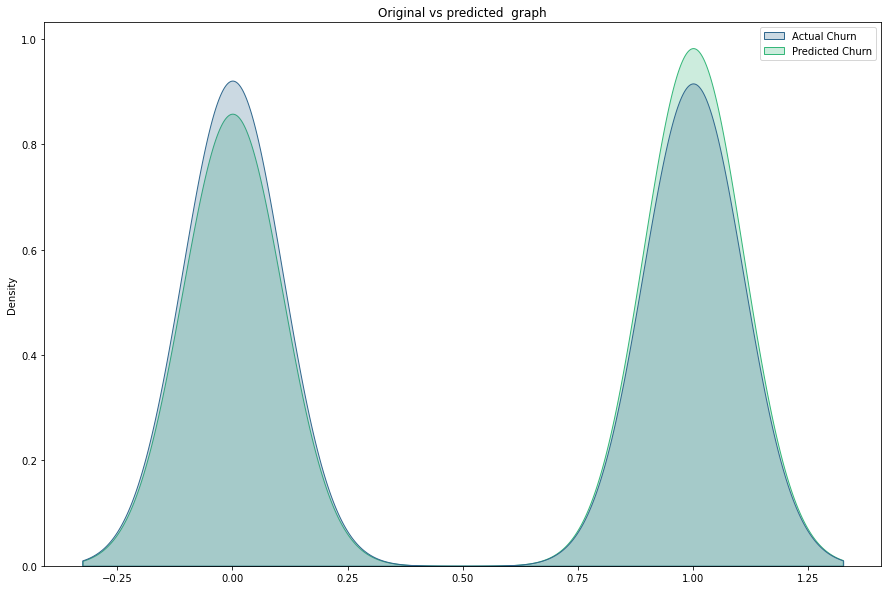

In [147]:
#Visulizing actual vs Predicted
plt.figure(figsize = (15,10))
sns.kdeplot(data = churn, palette = 'viridis', gridsize = 900, shade = True)
plt.title('Original vs predicted  graph')
plt.show()

# ========================thankyou========================